<a href="https://colab.research.google.com/github/ShubhMittal44/Stock-Price-Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [2]:
from google.colab import files
dataset = files.upload()

In [7]:
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
1,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
3,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
4,2010-07-08,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2387,2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
2388,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
2389,2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500
2390,2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000


In [8]:
df.shape

(2392, 7)

In [9]:
df = df['Open'].values
df = df.reshape(-1, 1)

In [10]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [12]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [13]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 16s 154ms/step - loss: 0.0201
Epoch 2/50
59/59 [==============================] - 9s 154ms/step - loss: 0.0033
Epoch 3/50
59/59 [==============================] - 9s 152ms/step - loss: 0.0031
Epoch 4/50
59/59 [==============================] - 9s 153ms/step - loss: 0.0029
Epoch 5/50
59/59 [==============================] - 9s 153ms/step - loss: 0.0034
Epoch 6/50
59/59 [==============================] - 9s 153ms/step - loss: 0.0027
Epoch 7/50
59/59 [==============================] - 9s 154ms/step - loss: 0.0025
Epoch 8/50
59/59 [==============================] - 9s 152ms/step - loss: 0.0029
Epoch 9/50
59/59 [==============================] - 9s 153ms/step - loss: 0.0027
Epoch 10/50
59/59 [==============================] - 9s 155ms/step - loss: 0.0021
Epoch 11/50
59/59 [==============================] - 9s 155ms/step - loss: 0.0024
Epoch 12/50
59/59 [==============================] - 9s 154ms/step - loss: 0.0021
Epoch 13/50
59/59 [=====

In [19]:
model = load_model('stock_prediction.h5')

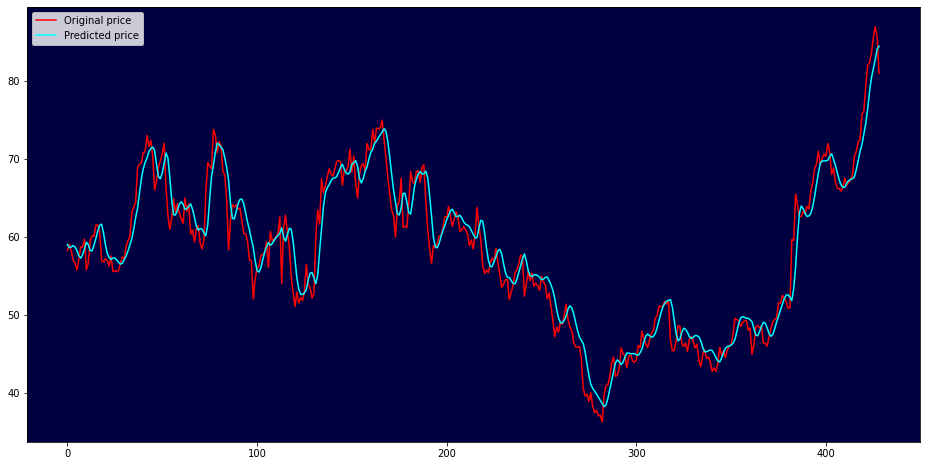

In [20]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()